### **Clustering**
Clustering is concerned about grouping objects with  *similar attributes* or *characteristics*

The objects in the same cluster are closer to one another than the objects from the other clusters.

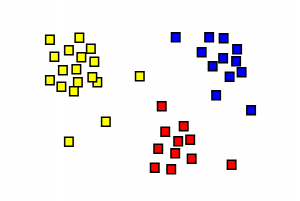

In the image above, the clusters with same color share similar properties(feature values represented on axis). 

For instance, if the x-axis represents weight and y-axis represents height, the yellow color cluster represents people with low BMI. 

Similar interpretations can be drawn for the remaining clusters.

### **Hierarchical Agglomerative Clustering (HAC)**

Earlier in this week, we studied k-means clustering algorithm. 

In this notebook, we will discuss another clustering algorithm which is **Hierarchical agglomerative clustering (HAC)** algorithm.



* Hierarchical clustering start by considering each datapoint as a cluster and then combines closest clusters to form larger clusters i.e it follows a **bottoms-up approach**.

* There is an alternate approach, which is **top-down approach**, where the entire data is considered as a one single cluster, which is divided to form smaller clusters in each step.

* This is another type of hierarchical clustering also known as **Divisive Hierarchical Clustering (DHC)**.


The merging and splitting decisions are influenced by certain conditions that will be discussed shortly.


### **Metrics**

Certain metrics are used for calculating similarity between clusters. 

**Note:**  Metric is a generalization of concept of distance. 

The metrics follow certain properties like : 

1. non-negative 

2. sysmetric

3. follows triangle inequality 



Some of the popular metric functions are :

1. **Euclidean distance -**

\begin{align}
d(x^{(i)} , x^{(j)}) = \sqrt{\sum{^m _{l=1}} {(x_l^{(i)} - x_l^{(j)})^2}}
\end{align}

2. **Manhattan distance -**

\begin{align}
d(x^{(i)} , x^{(j)}) = \sum{^m _{l=1}} {\left\lvert(x_l^{(i)} - x_l^{(j)})\right\rvert}
\end{align}

3. **Cosine distance -**

\begin{align}
d(x^{(i)} , x^{(j)}) = 1 - \frac{x^{(i)}. x^{(j)}}{\left\lvert \left\lvert x^{(i)} \right\rvert \right\rvert \left\lvert \left\lvert x^{(j)} \right\rvert \right\rvert} 

= 1 - \cos{\theta}
\end{align}

### **Linkage**

Linkage is a strategy for aggregating clusters.

There are four linkages that we will study : 
* Single linkage

* Average linkage

* Complete linkage

* Ward's linkage


The **Single linkage** criterion merges clusters based on the shortest distance over all possible pairs i.e. 

$ \left ({ \mathbf \{ x_{r_1}^{(i)}\}_{i=1}^{|r_1|} },{\mathbf \{ x_{r_2}^{(j)}\}_{j=1}^{|r_2|} } \right) = \text {min}_{i,j} d\left(\mathbf x_{r_1}^{(i)}, \mathbf x_{r_2}^{(j)}\right) $

![](Images/single_linkage.png)


The **Complete linkage** merges clusters to minimize the maximum distance between the clusters (in other words, the distance of the furthest elements)

$ \left ({ \mathbf \{ x_{r_1}^{(i)}\}_{i=1}^{|r_1|} },{\mathbf \{ x_{r_2}^{(j)}\}_{j=1}^{|r_2|} } \right) = \text {max}_{i,j} d\left(\mathbf x_{r_1}^{(i)}, \mathbf x_{r_2}^{(j)}\right) $

![](Images/complete_linkage.png)

The **average linkage** criterion uses average distance over all possible pairs between the groups for merging clusters. 

$ \left ({ \mathbf \{ x_{r_1}^{(i)}\}_{i=1}^{|r_1|} },{\mathbf \{ x_{r_2}^{(j)}\}_{j=1}^{|r_2|} } \right) = \frac {1}{|r_1r_2|} \sum_{i=1}^{|r_1|} \sum_{j=1}^{|r_2|} d\left(\mathbf x_{r_1}^{(i)}, \mathbf x_{r_2}^{(j)}\right) $

![](Images/average_linkage.png)

**Ward's linkage**

It computes the sum of squared distances withing the clusters.


$ \left ({ \mathbf \{ x_{r_1}^{(i)}\}_{i=1}^{|r_1|} } , {\mathbf \{ x_{r_2}^{(j)}\}_{j=1}^{|r_2|} } \right) = \sum_{i=1}^{|r_1|} \sum_{j=1}^{|r_2|} ||(\mathbf x_{r_1}^{(i)} - \mathbf x_{r_2}^{(j)} ||^2 $


### **Algorithm :**

1. Calculate the distance matrix between pairs of clusters.

2. While all the objects are clustered into one.
    * Detect the two closest groups (clusters) and merge them.


### **Dendrogram**

Dendrograms are a graphical representation of the agglomerative process which shows a how aggregation happens at each level.

### **Importing Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ;sns.set()

from sklearn.preprocessing import normalize

Lets take example of a toy dataset to understand this : 

In [2]:
X = np.array([(8, 3), (5, 3), (6, 4), (1, 6), (2, 8)])
X_scaled = normalize(X)

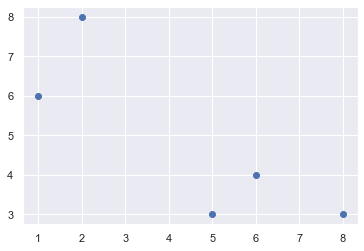

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Let's plot the dendrogram with `scipy.cluster.hierarchy` library


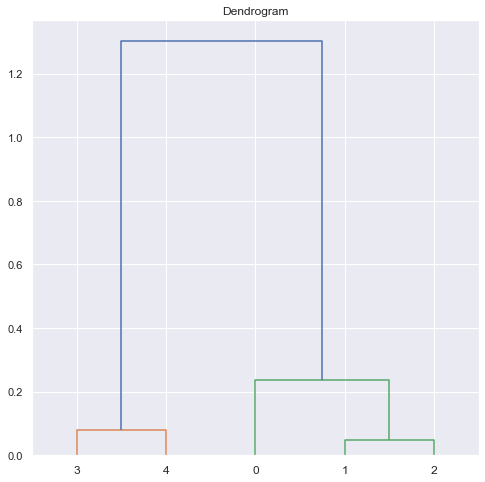

In [4]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(8, 8))
plt.title('Dendrogram')
dend = sch.dendrogram(sch.linkage(X_scaled, method='ward'))

HAC is implemented in `sklearn.cluster` module as `AgglomerativeClustering` class.